In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
!ls

Untitled.ipynb  images          testing_images  untitled folder


In [3]:
data_dir = 'images/'
for file in os.listdir(data_dir):
    print(file)

three_line_strike_bearish
.DS_Store
evening_star_bearish
two_black_gapping_bearish
three_black_crows_bearish
bullish_pin
three_line_strike_bullish
bearish_pin


In [4]:
import glob

three_line_strike_bearish = glob.glob('images/three_line_strike_bearish/*.png')
evening_star_bearish = glob.glob('images/evening_star_bearish/*.png')
two_black_gapping_bearish = glob.glob('images/two_black_gapping_bearish/*.png')
three_black_crows_bearish = glob.glob('images/three_black_crows_bearish/*.png')
bullish_pin = glob.glob('images/bullish_pin/*.png')
three_line_strike_bullish = glob.glob('images/three_line_strike_bullish/*.png')
bearish_pin = glob.glob('images/bearish_pin/*.png')

print('number of images per class\n')
print(f'three_line_strike_bearish: {len(three_line_strike_bearish)}')
print(f'evening_star_bearish: {len(evening_star_bearish)}')
print(f'two_black_gapping_bearish: {len(two_black_gapping_bearish)}')
print(f'three_black_crows_bearish: {len(three_black_crows_bearish)}')
print(f'bullish_pin: {len(bullish_pin)}')
print(f'three_line_strike_bullish: {len(three_line_strike_bullish)}')
print(f'bearish_pin: {len(bearish_pin)}')

number of images per class

three_line_strike_bearish: 16
evening_star_bearish: 1
two_black_gapping_bearish: 1
three_black_crows_bearish: 1
bullish_pin: 22
three_line_strike_bullish: 11
bearish_pin: 20


In [5]:
three_line_strike_bearish[0]

'images/three_line_strike_bearish/Screen Shot 2022-02-27 at 9.25.48 AM.png'

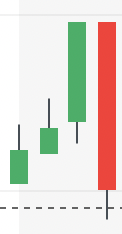

In [6]:
PIL.Image.open(three_line_strike_bearish[0])

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 72 files belonging to 7 classes.
Using 58 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 72 files belonging to 7 classes.
Using 14 files for validation.


In [10]:
class_names = train_ds.class_names
class_names

['bearish_pin',
 'bullish_pin',
 'evening_star_bearish',
 'three_black_crows_bearish',
 'three_line_strike_bearish',
 'three_line_strike_bullish',
 'two_black_gapping_bearish']

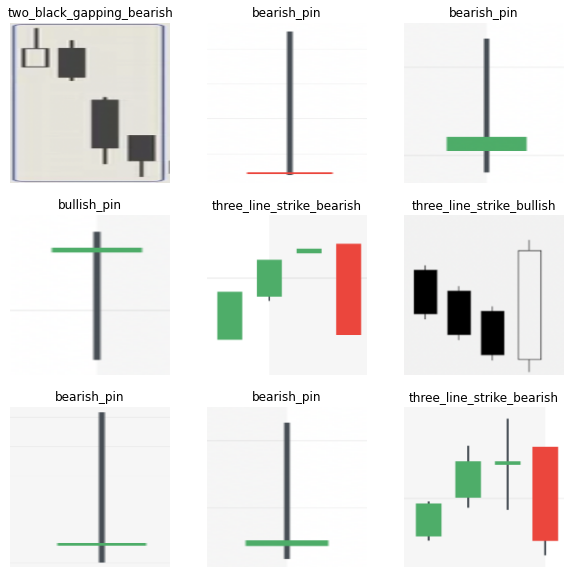

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
normalization_layer = layers.Rescaling(1/255)

In [32]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.23640521 1.0


In [17]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [20]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
2/2 [==============================] - 1s 210ms/step - loss: 5.0170 - accuracy: 0.2241 - val_loss: 3.6549 - val_accuracy: 0.2143
Epoch 2/10
2/2 [==============================] - 0s 53ms/step - loss: 2.4640 - accuracy: 0.3276 - val_loss: 1.3226 - val_accuracy: 0.3571
Epoch 3/10
2/2 [==============================] - 0s 52ms/step - loss: 1.5970 - accuracy: 0.2931 - val_loss: 1.3445 - val_accuracy: 0.5714
Epoch 4/10
2/2 [==============================] - 0s 53ms/step - loss: 1.4835 - accuracy: 0.5862 - val_loss: 1.2535 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 47ms/step - loss: 1.3472 - accuracy: 0.5690 - val_loss: 1.1276 - val_accuracy: 0.6429
Epoch 6/10
2/2 [==============================] - 0s 52ms/step - loss: 1.1960 - accuracy: 0.5690 - val_loss: 1.0125 - val_accuracy: 0.7143
Epoch 7/10
2/2 [==============================] - 0s 53ms/step - loss: 1.0051 - accuracy: 0.7241 - val_loss: 0.7795 - val_accuracy: 0.7143
Epoch 8/10
2/2 [==========

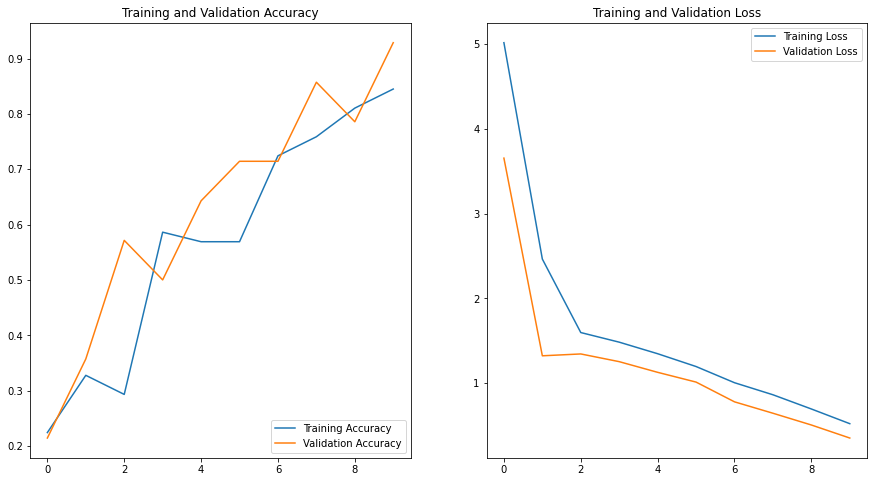

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
unseen_path = 'testing_images/'

unseen_images = tf.keras.utils.image_dataset_from_directory(
    unseen_path,
    image_size=(img_height, img_width))

Found 16 files belonging to 1 classes.


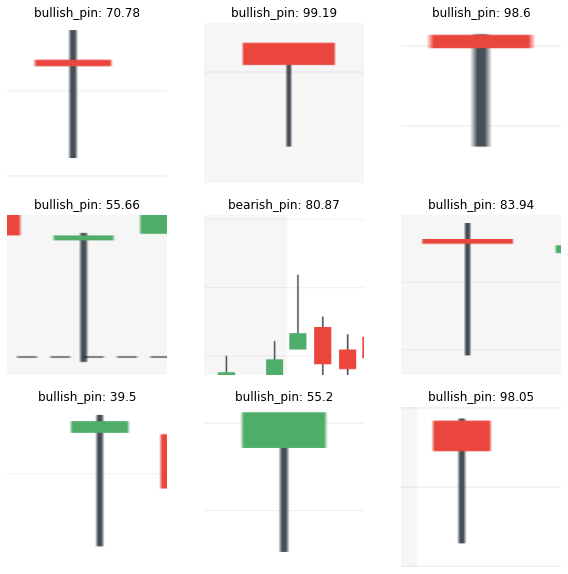

In [28]:
plt.figure(figsize=(10, 10))
for images, labels in unseen_images.take(1):
    for i in range(9):
        img_array = tf.keras.utils.img_to_array(images[i])
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f'{class_names[np.argmax(score)]}: {round(100 * np.max(score), 2)}')
        plt.axis("off")